# Description

Make plots to show the computational complexity results comparing all coefficients.

# Modules loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from ccc import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
COEF_COMP_DIR = conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp"
COEF_COMP_DIR.mkdir(parents=True, exist_ok=True)
display(COEF_COMP_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp')

In [5]:
OUTPUT_FIGURE_DIR = COEF_COMP_DIR / "time_test"
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/time_test')

In [6]:
INPUT_DIR = conf.RESULTS_DIR / "time_test"
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [7]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [8]:
time_results.shape

(15990, 4)

In [9]:
time_results.head()

,data_size,method,time,sim
0,100,p-1,0.000118,0.025538
1,100,p-1,0.000057,-0.151557
2,100,p-1,0.000057,-0.057741
3,100,p-1,0.000054,-0.015025
4,100,p-1,0.000056,0.061830


In [10]:
time_results["method"].unique()

array(['p-1', 's-1', 'cm-1', 'mic_e-1', 'mic-1', 'p-3', 's-3', 'cm-3',
       'mic_e-3', 'mic-3', 'p-6', 's-6', 'cm-6', 'mic_e-6', 'mic-6'],
      dtype=object)

# Processing

In [11]:
time_results = time_results.replace(
    {
        "method": {
            "p-1": "Pearson (1 core)",
            "s-1": "Spearman (1 core)",
            "cm-1": "CCC (1 core)",
            "mic-1": "MIC (1 core)",
            "mic_e-1": "MICe (1 core)",
            "p-3": "Pearson (3 cores)",
            "s-3": "Spearman (3 cores)",
            "cm-3": "CCC (3 cores)",
            "mic-3": "MIC (3 cores)",
            "mic_e-3": "MICe (3 cores)",
            "p-6": "Pearson (6 cores)",
            "s-6": "Spearman (6 cores)",
            "cm-6": "CCC (6 cores)",
            "mic-6": "MIC (6 cores)",
            "mic_e-6": "MICe (6 cores)",
        }
    }
)

In [12]:
time_results.shape

(15990, 4)

In [13]:
time_results.head()

,data_size,method,time,sim
0,100,Pearson (1 core),0.000118,0.025538
1,100,Pearson (1 core),0.000057,-0.151557
2,100,Pearson (1 core),0.000057,-0.057741
3,100,Pearson (1 core),0.000054,-0.015025
4,100,Pearson (1 core),0.000056,0.061830


# Run numbers

In [14]:
plot_data = time_results

In [15]:
run_numbers = (
    plot_data[
        plot_data["method"].str.contains("1 core", regex=False)
        | plot_data["method"].str.contains("CCC (3 cores)", regex=False)
        | plot_data["method"].str.contains("CCC (6 cores)", regex=False)
    ]
    .groupby(["data_size", "method"])["time"]
    .describe()
)
display(run_numbers)

count       mean       std        min  \
data_size method                                                      
100       CCC (1 core)       1000.0   0.000666  0.000023   0.000646   
          CCC (3 cores)      1000.0   0.001180  0.000431   0.000924   
          CCC (6 cores)      1000.0   0.002905  0.001565   0.001199   
          MIC (1 core)       1000.0   0.000727  0.000026   0.000653   
          MICe (1 core)      1000.0   0.000677  0.000023   0.000612   
          Pearson (1 core)   1000.0   0.000030  0.000004   0.000027   
          Spearman (1 core)  1000.0   0.000214  0.000009   0.000203   
500       CCC (1 core)         10.0   0.000996  0.000033   0.000957   
          CCC (3 cores)        10.0   0.001274  0.000284   0.001109   
          CCC (6 cores)        10.0   0.001447  0.000290   0.001295   
          MIC (1 core)         10.0   0.011661  0.000251   0.011321   
          MICe (1 core)        10.0   0.008910  0.000108   0.008762   
          Pearson (1 core)     10.0   0.000039  0.000019   0.000031   
          Spearman (1 core)    10.0   0.000268  0.000021   0.000253   
1000      CCC (1 core)         10.0   0.001497  0.000044   0.001446   
          CCC (3 cores)        10.0   0.001365  0.000128   0.001276   
          CCC (6 cores)        10.0   0.001611  0.000476   0.001371   
          MIC (1 core)         10.0   0.037298  0.000363   0.036865   
          MICe (1 core)        10.0   0.024814  0.000147   0.024626   
          Pearson (1 core)     10.0   0.000037  0.000008   0.000033   
          Spearman (1 core)    10.0   0.000310  0.000024   0.000299   
5000      CCC (1 core)         10.0   0.006793  0.000063   0.006712   
          CCC (3 cores)        10.0   0.003262  0.000390   0.002975   
          CCC (6 cores)        10.0   0.002539  0.000460   0.002175   
          MIC (1 core)         10.0   0.511349  0.002060   0.507993   
          MICe (1 core)        10.0   0.228765  0.000574   0.228005   
          Pearson (1 core)     10.0   0.000052  0.000018   0.000044   
          Spearman (1 core)    10.0   0.000659  0.000021   0.000637   
10000     CCC (1 core)         10.0   0.013926  0.000147   0.013725   
          CCC (3 cores)        10.0   0.005708  0.000460   0.005355   
          CCC (6 cores)        10.0   0.003717  0.000440   0.003421   
          MIC (1 core)         10.0   1.599225  0.007866   1.589486   
          MICe (1 core)        10.0   0.573671  0.001753   0.570994   
          Pearson (1 core)     10.0   0.000064  0.000015   0.000056   
          Spearman (1 core)    10.0   0.001155  0.000044   0.001117   
50000     CCC (1 core)         10.0   0.080076  0.000550   0.079234   
          CCC (3 cores)        10.0   0.028608  0.000566   0.028075   
          CCC (6 cores)        10.0   0.015810  0.001452   0.014696   
          MICe (1 core)        10.0   4.864497  0.006380   4.850308   
          Pearson (1 core)     10.0   0.000203  0.000119   0.000161   
          Spearman (1 core)    10.0   0.006219  0.000161   0.005955   
100000    CCC (1 core)         10.0   0.170097  0.003155   0.167927   
          CCC (3 cores)        10.0   0.059770  0.001582   0.058275   
          CCC (6 cores)        10.0   0.032998  0.002454   0.030348   
          Pearson (1 core)     10.0   0.000366  0.000182   0.000305   
          Spearman (1 core)    10.0   0.013535  0.000294   0.013243   
1000000   CCC (1 core)         10.0   2.372261  0.020208   2.342887   
          CCC (3 cores)        10.0   0.905189  0.008474   0.890630   
          CCC (6 cores)        10.0   0.530131  0.004317   0.523327   
          Pearson (1 core)     10.0   0.008773  0.000673   0.007965   
          Spearman (1 core)    10.0   0.173665  0.002054   0.171339   
10000000  CCC (1 core)         10.0  42.193259  0.063420  42.062988   
          CCC (3 cores)        10.0  15.931200  0.056833  15.842030   
          CCC (6 cores)        10.0   9.127771  0.038662   9.079449   
          Pearson (1 core)     10.0   0.094113  0.0004

In [16]:
# this is necessary to make sure we did not mix results when running the time test notebooks
# that could happen if the notebooks are run separately without running them all together
assert run_numbers["count"].unique().shape[0] == 2

# Plot

In [17]:
hue_order = sorted(time_results["method"].unique())

In [18]:
hue_order

['CCC (1 core)',
 'CCC (3 cores)',
 'CCC (6 cores)',
 'MIC (1 core)',
 'MIC (3 cores)',
 'MIC (6 cores)',
 'MICe (1 core)',
 'MICe (3 cores)',
 'MICe (6 cores)',
 'Pearson (1 core)',
 'Pearson (3 cores)',
 'Pearson (6 cores)',
 'Spearman (1 core)',
 'Spearman (3 cores)',
 'Spearman (6 cores)']

In [19]:
deep_colors = sns.color_palette("Paired")
display(deep_colors)

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [20]:
def format_data_size(x):
    if x < 1000:
        return f"{int(x)}"
    elif x < 1000000:
        return f"{int(x/1000)}k"

    return f"{int(x/1000000)}m"


plot_data = plot_data.assign(data_size=plot_data["data_size"].apply(format_data_size))

## First analysis

Here I take a look if using more than 1 core benefits methods.

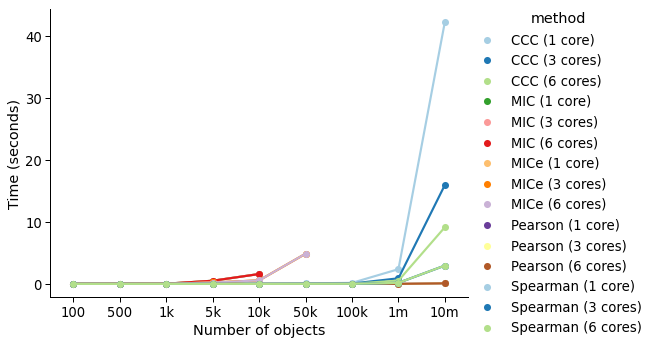

In [21]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds)")

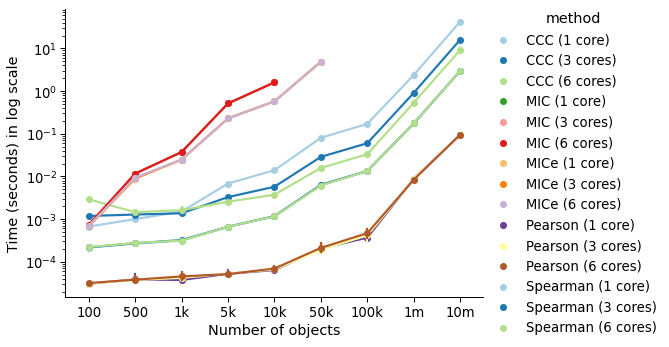

In [22]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.4,
    )

    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds) in log scale")

    g.ax.set_yscale("log")

Only CCC is really taking advantage of more than 1 core, so I'll remove the rest below.

# Final analysis

In [23]:
# select runs with 3 cores for the other methods
plot_data = plot_data.replace(
    {
        "method": {
            "Pearson (6 cores)": "Pearson",
            "Spearman (6 cores)": "Spearman",
            "MIC (6 cores)": "MIC",
            "MICe (6 cores)": r"$\mathregular{MIC_e}$",
        }
    }
)

In [24]:
plot_data["method"].unique()

array(['Pearson (1 core)', 'Spearman (1 core)', 'CCC (1 core)',
       'MICe (1 core)', 'MIC (1 core)', 'Pearson (3 cores)',
       'Spearman (3 cores)', 'CCC (3 cores)', 'MICe (3 cores)',
       'MIC (3 cores)', 'Pearson', 'Spearman', 'CCC (6 cores)',
       '$\\mathregular{MIC_e}$', 'MIC'], dtype=object)

In [25]:
hue_order = [
    "MIC",
    r"$\mathregular{MIC_e}$",
    "CCC (1 core)",
    "CCC (6 cores)",
    "Spearman",
    "Pearson",
]

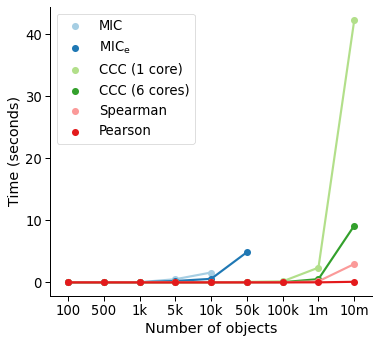

In [26]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.legend(loc="best")
    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds)")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}.svg",
        bbox_inches="tight",
        facecolor="white",
    )

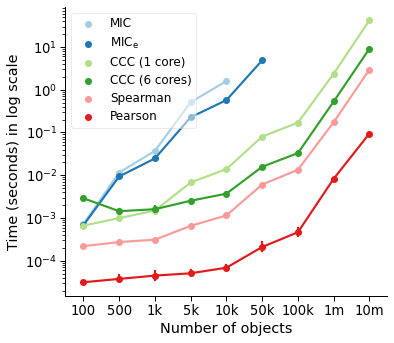

In [27]:
with sns.plotting_context("paper", font_scale=1.5):
    g = sns.catplot(
        kind="point",
        data=plot_data,
        x="data_size",
        y="time",
        hue="method",
        hue_order=hue_order,
        palette=deep_colors,
        height=5,
        aspect=1.1,
        legend=False,
    )

    plt.legend(loc="best", fontsize="small", framealpha=0.5)
    plt.xlabel("Number of objects")
    plt.ylabel("Time (seconds) in log scale")
    g.ax.set_yscale("log")

    plt.savefig(
        OUTPUT_FIGURE_DIR / f"{INPUT_FILENAME_TEMPLATE}-log.svg",
        bbox_inches="tight",
        facecolor="white",
    )

# Create final figure

In [28]:
from svgutils.compose import Figure, SVG

In [29]:
Figure(
    "19.79335cm",
    "17.09335cm",
    # white background
    SVG(COEF_COMP_DIR / "white_background.svg").scale(0.5).move(0, 0),
    # SVG(OUTPUT_FIGURE_DIR / "time_test.svg").scale(0.05),
    SVG(OUTPUT_FIGURE_DIR / "time_test-log.svg").scale(0.05),
).save(OUTPUT_FIGURE_DIR / "time_test-main.svg")

Compile the manuscript with manubot and make sure the image has a white background and displays properly.